In [1]:
import sys
import numpy as np
import ltbsymm as ls

# Start a TB object and set/load configuration
mytb = ls.TB()
mytb.load('out_1.08_2AA', bands='bands_.npz', configuration='configuration_.npz')


TB object created
loading  out_1.08_2AA/configuration_.npz
loading  out_1.08_2AA/bands_.npz


In [2]:
# Start a Symm object and set/load configuration
sm = ls.Symm(mytb)


Symm object created


Operation C2z is defined as  non-symmorphic -X+1/2*Rx, -Y+1/2*Ry, Z
Symmetry map for C2z has built successfully.  218  where marginal at boundaries.


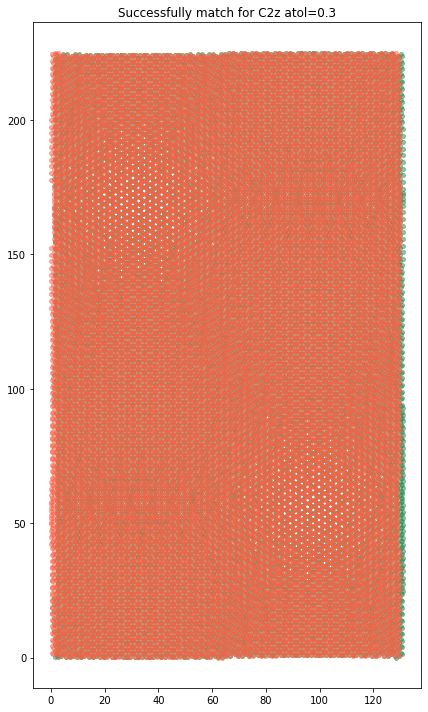

Operation C2y is defined as  non-symmorphic -X, Y+1/2*Ry, -Z
Symmetry map for C2y has built successfully.  218  where marginal at boundaries.
Operation C2x is defined as  non-symmorphic X+1/2*Rx, -Y, -Z
Symmetry map for C2x has built successfully.  216  where marginal at boundaries.
**Making C2x matrix at Gamma:[0. 0. 0.] **
**Making C2y matrix at Gamma:[0. 0. 0.] **


/home/ali/Apt/anaconda3/lib/python3.8/site-packages/scipy/sparse/_lil.py:326: ComplexWarning: Casting complex values to real discards the imaginary part
  x = self.dtype.type(x)


**Making C2z matrix at Gamma:[0. 0. 0.] **


In [3]:
# Define all symmetry operations of the space group
sm.build_map('C2z',['-X+1/2*Rx','-Y+1/2*Ry','Z'], atol=0.3, plot = True)
sm.build_map('C2y',['-X','Y+1/2*Ry','-Z'], atol=0.3)
sm.build_map('C2x',['X+1/2*Rx','-Y','-Z'], atol=0.3)

# Make the operation Matrix at a given point of receiprocal space
sm.make_Cmat('C2x', 'Gamma')
sm.make_Cmat('C2y', 'Gamma')
sm.make_Cmat('C2z', 'Gamma')

In [4]:
# Check operations square and how they commute 
sm.check_square('C2x', 'Gamma', ftol = 30)
sm.check_square('C2y', 'Gamma', ftol = 30)
sm.check_square('C2z', 'Gamma', ftol = 30)
sm.check_commute('C2x', 'C2y', 'Gamma', ftol=30) 
sm.check_commute('C2z', 'C2y', 'Gamma', ftol=30) 
sm.check_commute('C2x', 'C2z', 'Gamma', ftol=30) 

C2x @ C2x = identity at Gamma
C2y @ C2y = identity at Gamma
C2z @ C2z = identity at Gamma
[C2x, C2y] do commute at Gamma
[C2z, C2y] do commute at Gamma
[C2x, C2z] do commute at Gamma


In [5]:
# Detect and identify flat bands
mytb.detect_flat_bands()

8  flat bands detected


In [6]:
# Check if wave functions are diagonal respect to symmetries
sm.vector_diag('Gamma', name1='C2x', subSize = 4, skip_diag = True)



** vector_diag at Gamma **


Subspace 1.0 with energies:
0.005687156959874318
0.005675662193339814
-0.0003969110247522556
-0.00041691802874066486
<psi| C2z |psi>
[[-0.8+0.j , 0.5-0.2j,-0. +0.j ,-0. +0.j ],
 [ 0.5+0.2j, 0.8+0.j , 0. -0.j ,-0. +0.j ],
 [-0. -0.j , 0. +0.j , 0.9+0.j , 0.3-0.j ],
 [-0. -0.j ,-0. -0.j , 0.3+0.j ,-0.9+0.j ]]
<psi| C2y |psi>
[[ 1.+0.j, 0.-0.j, 0.-0.j,-0.+0.j],
 [ 0.+0.j, 1.+0.j, 0.-0.j,-0.+0.j],
 [ 0.+0.j, 0.+0.j,-1.+0.j,-0.+0.j],
 [-0.-0.j,-0.-0.j,-0.-0.j,-1.+0.j]]
<psi| C2x |psi>
[[-0.8+0.j , 0.5-0.2j, 0. -0.j ,-0. +0.j ],
 [ 0.5+0.2j, 0.8+0.j , 0. -0.j , 0. -0.j ],
 [ 0. +0.j , 0. +0.j ,-0.9+0.j ,-0.3+0.j ],
 [-0. -0.j , 0. +0.j ,-0.3-0.j , 0.9+0.j ]]

Subspace 2.0 with energies:
-0.003000614802293855
-0.003018659755200659
-0.0035570670624436307
-0.0036018736346046243
<psi| C2z |psi>
[[-0.5+0.j ,-0.1+0.9j, 0. +0.j ,-0. +0.j ],
 [-0.1-0.9j, 0.5+0.j ,-0. +0.j ,-0. -0.j ],
 [ 0. -0.j ,-0. -0.j , 0.5+0.j ,-0.3+0.8j],
 [-0. -0.j ,-0. +0.j ,-0.3-0.8j,-0.5-0.j 

In [7]:
# Diagonalize wave vectors respect to a given symmetry 
sm.vector_diag('Gamma', name1='C2z', name2= 'C2x', subSize = 4, rtol=0.1, skip_diag = False)




** vector_diag at Gamma **


Diagonalizing flat bands subspace 1.0 with energies:
0.005687156959874318
0.005675662193339814
-0.0003969110247522556
-0.00041691802874066486
<psi| C2z |psi>
[[-0.8+0.j , 0.5-0.2j,-0. +0.j ,-0. +0.j ],
 [ 0.5+0.2j, 0.8+0.j , 0. -0.j ,-0. +0.j ],
 [-0. -0.j , 0. +0.j , 0.9+0.j , 0.3-0.j ],
 [-0. -0.j ,-0. -0.j , 0.3+0.j ,-0.9+0.j ]]
Diagonalizing respect to  C2z
eignvalues:  [-1.-0.j, 1.+0.j, 1.+0.j,-1.-0.j]

 Second off-diagonalizing respect to  C2x
upper_block is
 [[-1.+0.j, 0.-0.j],
 [ 0.+0.j, 1.+0.j]]
eignvalues:  [-1.-0.j, 1.-0.j]
lower_block is
 [[-1.+0.j,-0.+0.j],
 [-0.-0.j, 1.+0.j]]
eignvalues:  [-1.-0.j, 1.+0.j]

Final check if diagonalized respect to  C2z
[[-1.+0.j,-0.+0.j, 0.+0.j, 0.-0.j],
 [-0.-0.j, 1.+0.j,-0.+0.j, 0.+0.j],
 [ 0.-0.j,-0.-0.j, 1.+0.j,-0.+0.j],
 [ 0.+0.j,-0.-0.j,-0.-0.j,-1.+0.j]]

Final check if diagonalized respect to  C2y
[[ 1.+0.j, 0.-0.j, 0.-0.j,-0.+0.j],
 [ 0.+0.j, 1.+0.j,-0.+0.j, 0.-0.j],
 [ 0.+0.j,-0.-0.j,-1.+0.j,-0.+0.j],

In [8]:
# You can save sm object 
sm.save()